tensorflow_sigmoid_basic NN

Extracting /~/deep_learning_zeroToAll/train-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/train-labels-idx1-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost =  2.996679431
Epoch: 0002 cost =  1.148799383
Epoch: 0003 cost =  0.908504287
Epoch: 0004 cost =  0.791161368
Epoch: 0005 cost =  0.716022960
Epoch: 0006 cost =  0.663118176
Epoch: 0007 cost =  0.622578404
Epoch: 0008 cost =  0.590757774
Epoch: 0009 cost =  0.564415528
Epoch: 0010 cost =  0.542386433
Epoch: 0011 cost =  0.523108893
Epoch: 0012 cost =  0.507294027
Epoch: 0013 cost =  0.493484892
Epoch: 0014 cost =  0.481025273
Epoch: 0015 cost =  0.469802035
Learning finished
Accuracy:  0.8934
Label:  [2]
Prediction:  [8]


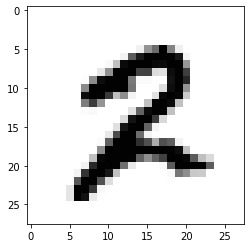

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data
 
# read data
mnist = input_data.read_data_sets("/~/deep_learning_zeroToAll/", one_hot=True)
 
nb_classes = 10
 
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])
 
W = tf.Variable(tf.random_normal([784,nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))
 
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)
 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)
 
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
 
training_epochs = 30
batch_size = 100
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _= sess.run([cost,optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
 
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
 
    # Get one and predict using matplotlib
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
 
    plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28),cmap='Greys',interpolation='nearest')
    plt.show()

tensorflow_Relu_NN

Extracting /~/deep_learning_zeroToAll/train-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/train-labels-idx1-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch: 0001 cost =  164.621222184
Epoch: 0002 cost =  40.283556506
Epoch: 0003 cost =  25.503178148
Epoch: 0004 cost =  17.973545398
Epoch: 0005 cost =  13.187028469
Epoch: 0006 cost =  9.863583258
Epoch: 0007 cost =  7.470922764
Epoch: 0008 cost =  5.696179271
Epoch: 0009 cost =  4.201767175
Epoch: 0010 cost =  3.266437993
Epoch: 0011 cost =  2.511214670
Epoch: 0012 cost =  1.936398911
Epoch: 0013 cost =  1.485138132
Epoch: 0014 cost =  1.241559559
Epoch: 0015 cost =  0.915303291
Learning finished
Accuracy:  0.9453
Label:  [9]
Prediction:  [8]


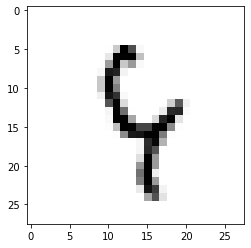

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data
 
tf.set_random_seed(777)
# read data
mnist = input_data.read_data_sets("/~/deep_learning_zeroToAll/", one_hot=True)
 
nb_classes = 10
 
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])
 
# W = tf.Variable(tf.random_normal([784,nb_classes]))
# b = tf.Variable(tf.random_normal([nb_classes]))
 
W1 = tf.Variable(tf.random_normal([784,256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
 
W2 = tf.Variable(tf.random_normal([256,256]))
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
 
W3 = tf.Variable(tf.random_normal([256,10]))
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
 
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
 
training_epochs = 15
batch_size = 100
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _= sess.run([cost,optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
 
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
 
    # Get one and predict using matplotlib
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
 
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

tensorflow_Relu_Xaviar_NN

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /~/deep_learning_zeroToAll/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /~/deep_learning_zeroToAll/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /~/deep_learning_zeroToAll/t10k-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.math.argmax

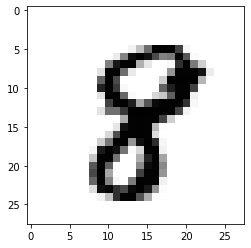

In [1]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data
 
tf.reset_default_graph()

tf.set_random_seed(777)
# read data
mnist = input_data.read_data_sets("/~/deep_learning_zeroToAll/", one_hot=True)
 
nb_classes = 10
 
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])
 
# W = tf.Variable(tf.random_normal([784,nb_classes]))
# b = tf.Variable(tf.random_normal([nb_classes]))
 
W1 = tf.get_variable("W1",shape=[784,256], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
 
W2 = tf.get_variable("W2",shape=[256,256], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
 
W3 = tf.get_variable("W3",shape=[256,10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b3
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
 
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
 
training_epochs = 15
batch_size = 100
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _= sess.run([cost,optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
 
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
 
    # Get one and predict using matplotlib
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
 
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

expand the number of layer

Extracting /~/deep_learning_zeroToAll/train-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/train-labels-idx1-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost =  0.296416299
Epoch: 0002 cost =  0.105913901
Epoch: 0003 cost =  0.072827831
Epoch: 0004 cost =  0.053160011
Epoch: 0005 cost =  0.039780915
Epoch: 0006 cost =  0.036420490
Epoch: 0007 cost =  0.030877478
Epoch: 0008 cost =  0.026319738
Epoch: 0009 cost =  0.023828820
Epoch: 0010 cost =  0.018878703
Epoch: 0011 cost =  0.019179811
Epoch: 0012 cost =  0.018810492
Epoch: 0013 cost =  0.014720884
Epoch: 0014 cost =  0.014314971
Epoch: 0015 cost =  0.015148447
Learning finished
Accuracy:  0.9811
Label:  [1]
Prediction:  [1]


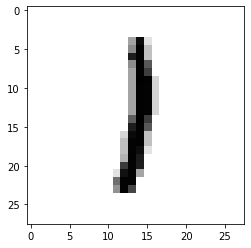

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data


tf.reset_default_graph()

tf.set_random_seed(777)
# read data
mnist = input_data.read_data_sets("/~/deep_learning_zeroToAll/", one_hot=True)
 
nb_classes = 10
 
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])
 
# W = tf.Variable(tf.random_normal([784,nb_classes]))
# b = tf.Variable(tf.random_normal([nb_classes]))

W1 = tf.get_variable("W1",shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
 
W2 = tf.get_variable("W2",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
 
W3 = tf.get_variable("W3",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
 
W4 = tf.get_variable("W4",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
 
W5 = tf.get_variable("W5",shape=[512,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
 
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
 
training_epochs = 15
batch_size = 100
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _= sess.run([cost,optimizer], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch
 
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
 
    # Get one and predict using matplotlib
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))
 
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()

tensorflow_drop-out

Extracting /~/deep_learning_zeroToAll/train-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/train-labels-idx1-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-images-idx3-ubyte.gz
Extracting /~/deep_learning_zeroToAll/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 cost =  0.468856147
Epoch: 0002 cost =  0.169603267
Epoch: 0003 cost =  0.130259501
Epoch: 0004 cost =  0.105948503
Epoch: 0005 cost =  0.090093881
Epoch: 0006 cost =  0.083276808
Epoch: 0007 cost =  0.075004868
Epoch: 0008 cost =  0.067194916
Epoch: 0009 cost =  0.062012865
Epoch: 0010 cost =  0.059268949
Epoch: 0011 cost =  0.057426236
Epoch: 0012 cost =  0.054701197
Epoch: 0013 cost =  0.048475568
Epoch: 0014 cost =  0.046776195
Epoch: 0015 cost =  0.047594910
Learning finished
Accuracy:  0.9829
Label:  [2]
Prediction:  [2]


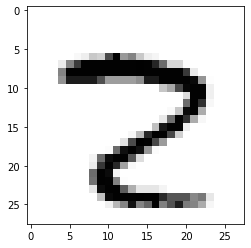

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.reset_default_graph()

tf.set_random_seed(777)
# read data
mnist = input_data.read_data_sets("/~/deep_learning_zeroToAll/", one_hot=True)
 
nb_classes = 10
keep_prob = tf.placeholder(tf.float32)
 
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,nb_classes])
 
# W = tf.Variable(tf.random_normal([784,nb_classes]))
# b = tf.Variable(tf.random_normal([nb_classes]))
 
W1 = tf.get_variable("W1",shape=[784,512], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
 
W2 = tf.get_variable("W2",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
 
W3 = tf.get_variable("W3",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
 
W4 = tf.get_variable("W4",shape=[512,512], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)
 
W5 = tf.get_variable("W5",shape=[512,10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
 
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)
 
is_correct = tf.equal(tf.arg_max(hypothesis,1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
 
training_epochs = 15
batch_size = 100
 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
 
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _= sess.run([cost,optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7})
            avg_cost += c / total_batch
 
        print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    print("Learning finished")
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
 
    # Get one and predict using matplotlib
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
    print("Prediction: ", sess.run(
        tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))
 
    plt.imshow(
        mnist.test.images[r:r + 1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()